In [24]:
import pandas as pd
import numpy as np
import psycopg2
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression

In [2]:
df_2019 = pd.read_csv('../../data/housing2019.csv', encoding='latin-1')

/Users/sam/opt/anaconda3/envs/linreg-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [86]:
# df_2019['MtRainier'].value_counts()
# df_2019['Olympics'].value_counts()
# df_2019['Cascades'].value_counts()
# df_2019['Territorial'].value_counts()
# df_2019['SeattleSkyline'].value_counts()
# df_2019['PugetSound'].value_counts()
# df_2019['LakeWashington'].value_counts()
# df_2019['LakeSammamish'].value_counts()
# df_2019['SmallLakeRiverCreek'].value_counts()
# df_2019['OtherView'].value_counts()

# df_2019['WfntLocation'].value_counts()

0    39103
2     2591
3     1178
4      673
Name: Territorial, dtype: int64

In [92]:
"""
selecting interested columns
"""
groomed_df = df_2019[['Major_+_Minor', 'SalePrice', 'SqFtTotLiving', 'SqFtOpenPorch', 
                          'SqFtEnclosedPorch', 'SqFtDeck', 'TidelandShoreland',
                          'TrafficNoise', 'AirportNoise', 'PowerLines', 'Stories', 'Condition', 'Area', 
                          'DocumentDate', 'MtRainier', 'Olympics', 'Cascades', 'Territorial', 'SeattleSkyline',
                          'PugetSound', 'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView',
                          'WaterSystem', 'SewerSystem']]


In [93]:
"""
filtering data
"""
groomed_df = groomed_df[groomed_df['SqFtTotLiving'] < 50000]
groomed_df = groomed_df[groomed_df['DocumentDate'].str.contains('2019')]
groomed_df['PricePerSqFt'] = groomed_df['SalePrice']/groomed_df['SqFtTotLiving']
groomed_df['TidelandShoreland'] = groomed_df['TidelandShoreland'].astype(bool).astype(int)
groomed_df['TrafficNoise'] = groomed_df['TrafficNoise'].astype(bool).astype(int)
groomed_df['TrafficNoise'].dtypes

dtype('int64')

In [6]:
groomed_df['TrafficNoise'].value_counts()

0    25332
1     4304
Name: TrafficNoise, dtype: int64

In [7]:
groomed_df.head()

,Major_+_Minor,SalePrice,SqFtTotLiving,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,TidelandShoreland,TrafficNoise,AirportNoise,PowerLines,Stories,Condition,Area,DocumentDate,PricePerSqFt
0,0087000215,255000,1150,90,370,0,0,0,0,N,1.0,3,30.0,07/25/2019,221.739130
3,0084000171,575000,3010,250,0,0,0,1,0,N,1.5,3,96.0,03/12/2019,191.029900
4,0098000940,1178000,4870,0,0,0,0,0,0,N,2.0,3,69.0,12/03/2019,241.889117
5,0088000172,505000,2280,30,0,0,0,0,0,N,2.0,3,30.0,09/04/2019,221.491228
7,0088000263,675000,2932,144,0,0,0,0,0,N,2.0,3,30.0,06/19/2019,230.218281


In [104]:
fsm_multi = ols(formula='SalePrice ~ SqFtTotLiving + SqFtOpenPorch + SqFtDeck + TidelandShoreland + Condition + Stories + Area + TrafficNoise + MtRainier + Olympics + Cascades + Territorial + SeattleSkyline + PugetSound + LakeWashington + LakeSammamish + SmallLakeRiverCreek + OtherView + WaterSystem + SewerSystem', data=groomed_df).fit()
fsm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     1095.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:46:35   Log-Likelihood:            -4.2383e+05
No. Observations:               29636   AIC:                         8.477e+05
Df Residuals:                   29615   BIC:                         8.479e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.529e+05   2.93e+04     -5.215      0.000    -2.1e+05   -9.54e+04
SqFtTotLiving         259.3322      2.829     91.662      0.000     253.787     264.878
SqFtOpenPorch         227.3224     17.631     12.894      0.000     192.766     261.879
SqFtDeck              123.8233     11.590     10.684      0.000     101.107     146.540
TidelandShoreland    3.921e+05   3.29e+04     11.917      0.000    3.28e+05    4.57e+05
Condition            1.704e+04   3615.286      4.713      0.000    9954.460    2.41e+04
Stories              5.078e+04   4802.440     10.574      0.000    4.14e+04    6.02e+04
Area                -1361.3272     88.519    -15.379      0.000   -1534.828   -1187.827
TrafficNoise         5.656e+04   6546.670      8.640      0.000    4.37e+04    6.94e+04
MtRainier            1.156e+04   9719.567      1.189      0.234   -7490.345    3.06e+04
Olympics             8.162e+04   8457.317      9.651      0.000     6.5e+04    9.82e+04
Cascades            -5919.7581   6786.782     -0.872      0.383   -1.92e+04    7382.635
Territorial         -1945.3589   4936.358     -0.394      0.694   -1.16e+04    7730.120
SeattleSkyline       1.515e+05   1.01e+04     14.996      0.000    1.32e+05    1.71e+05
PugetSound          -1638.0300   8845.690     -0.185      0.853    -1.9e+04    1.57e+04
LakeWashington       1.943e+05   7935.678     24.480      0.000    1.79e+05     2.1e+05
LakeSammamish        2.792e+05   1.25e+04     22.380      0.000    2.55e+05    3.04e+05
SmallLakeRiverCreek  5.432e+04   8326.389      6.524      0.000     3.8e+04    7.06e+04
OtherView            7.359e+04   1.35e+04      5.439      0.000    4.71e+04       1e+05
WaterSystem          4.243e+04   1.33e+04      3.197      0.001    1.64e+04    6.84e+04
SewerSystem           8.09e+04   7491.908     10.798      0.000    6.62e+04    9.56e+04
==============================================================================
Omnibus:                    14268.137   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           236709.552
Skew:                           1.907   Prob(JB):                         0.00
Kurtosis:                      16.310   Cond. No.                     3.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

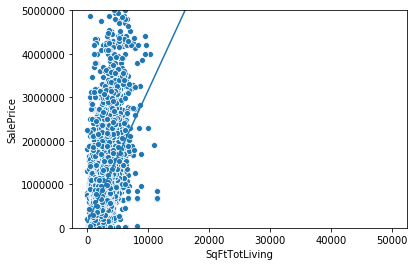

In [9]:
fsm = ols(formula='SalePrice ~ SqFtTotLiving', data=groomed_df).fit()
x = np.linspace(0, 50000)
m = fsm.params.SqFtTotLiving
b = fsm.params.Intercept
fig, ax = plt.subplots()
ax.set_ylim(0,5000000)
ax = sns.scatterplot(groomed_df['SqFtTotLiving'], groomed_df['SalePrice'])
ax = sns.lineplot(x, (m*x + b))


701898.4860759786

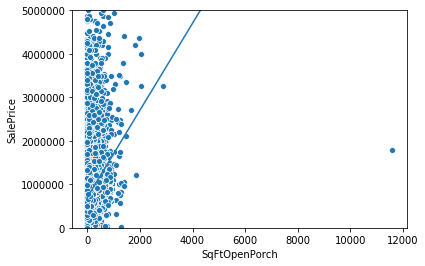

In [10]:
fsm = ols(formula='SalePrice ~ SqFtOpenPorch', data=groomed_df).fit()
x = np.linspace(0, 10000)
m = fsm.params.SqFtOpenPorch
b = fsm.params.Intercept
fig, ax = plt.subplots()
ax.set_ylim(0,5000000)
ax = sns.scatterplot(groomed_df['SqFtOpenPorch'], groomed_df['SalePrice'])
ax = sns.lineplot(x, (m*x + b))
b

In [11]:
fsm_multi = ols(formula='SalePrice ~ SqFtTotLiving + SqFtOpenPorch + SqFtDeck + TidelandShoreland + Condition + Stories + Area + TrafficNoise', data=groomed_df).fit()
fsm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     2255.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:57:01   Log-Likelihood:            -4.2499e+05
No. Observations:               29636   AIC:                         8.500e+05
Df Residuals:                   29627   BIC:                         8.501e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          8.367e+04   1.72e+04      4.874      0.000       5e+04    1.17e+05
SqFtTotLiving       279.6832      2.882     97.035      0.000     274.034     285.333
SqFtOpenPorch       204.7695     18.259     11.215      0.000     168.982     240.557
SqFtDeck            183.6007     11.721     15.664      0.000     160.627     206.574
TidelandShoreland  7.201e+05   2.84e+04     25.329      0.000    6.64e+05    7.76e+05
Condition          1.718e+04   3753.073      4.577      0.000    9821.464    2.45e+04
Stories             4.72e+04   4921.264      9.591      0.000    3.76e+04    5.68e+04
Area              -1937.0455     89.113    -21.737      0.000   -2111.712   -1762.379
TrafficNoise       6.264e+04   6778.476      9.241      0.000    4.94e+04    7.59e+04
==============================================================================
Omnibus:                    14575.217   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           225453.375
Skew:                           1.986   Prob(JB):                         0.00
Kurtosis:                      15.915   Cond. No.                     2.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

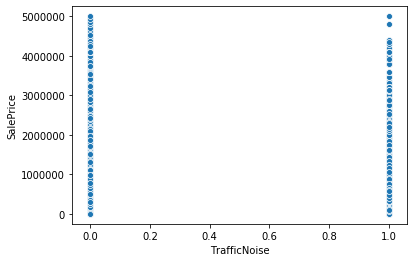

In [14]:
fig, ax = plt.subplots()
sns.scatterplot(data=groomed_df, x='TrafficNoise' , y='SalePrice')

In [105]:
def bootstrapped_ttest_bin(df, col_name):
    '''
    This function performs t-tests to get an accurate p-value 
    and t-statistic.using rows belonging to 
    its binary data values as the two arrays. 
    
    function takes in a data frame and a column name as a string.
    performs a two-sided t-test on the sale price of 1000 samples of 
    binary values within the given column and 
    
    '''
    select_0 = df[df[col_name] == 0]['SalePrice']
    select_1 = df[df[col_name] == 1]['SalePrice']
    Ps = []
    Ts = []
    for _ in range(0,1000):
        falsy_sample = np.random.choice(select_0, size=25, replace=False)
        truthy_sample = np.random.choice(select_1, size=25, replace=False)
        p_val = scipy.stats.ttest_ind(select_0, select_1).pvalue
        t_stat = scipy.stats.ttest_ind(select_1, select_0).statistic
        Ps.append(p_val)
        Ts.append(t_stat)
        
    return 'p-value: ', np.array(Ps).mean(), 'statistic: ', np.array(Ts).mean()

In [78]:
bootstrapped_welch_unequalsamp_bin(groomed_df, 'TidelandShoreland')

('p-value: ', 5.0360055268948825e-145, 'statistic: ', 25.78632558087656)